# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> EE 046211 - Technion - Deep Learning
---

## HW1 - Optimization and Automatic Differentiation
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Yair Stolero| yairstolero@gmail.com| 203619341|
|Shlomo Bohadana| shlomobo@campus.technion.ac.il| 036273423|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ee046211_hw1_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ee046211_hw1_id1_id2.zip` with content:
        * `ee046211_hw1_id1_id2.ipynb` - the code tasks
        * `ee046211_hw1_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw1` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Convergence of Gradient Descent](#-Question-1---Convergence-of-Gradient-Descent)
    * [Q2 - Optimization and Gradient Descent](#-Question-2---Optimization-and-Gradient-Descent)
    * [Q3 -Optimal Convergence Rate](#-Question-3---Optimal-Convergence-Rate)
    * [Q4 - Autodiff](#-Question-4----Automatic-Differentiation)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Beale Function](#-Task-1---The-Beale-Function)
    * [Task 2 - Building an Optimizer - Adam](#-Task-2---Building-an-Optimizer---Adam)
    * [Task 3 - PyTorch Autograd](#-Task-3---PyTorch-Autograd)
    * [Task 4 - Low Rank Matrix Factorization](#-Task-4---Low-Rank-Matrix-Factorization)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Convergence of Gradient Descent
---
Recall from the lecture notes:

* **Definition**: A function $f$ is $\beta$-smooth if: $$ \forall w_1, w_2 \in \mathbb{R}^d: ||\nabla f(w_1) - \nabla f(w_2)|| \leq \beta ||w_1 -w_2|| $$
* **Lemma**: If $f$ is $\beta$-smooth then $$ f(w_1) -f(w_2) -\nabla f(w_2)^T (w_1-w_2) \leq \frac{\beta}{2} ||w_1-w_2||^2 $$

Prove the lemma.

Hints:
* Represent $f$ as an integral: $f(x) − f(y) = \int_0^1 \nabla f(y + t(x-y))^T(x-y) dt $
* Make use of Cauchy-Schwarz.

###  Question 1-  Solution

We will use the first hint and express $f$ as an inetgral:

$$
f(w_1) - f(w_2) = \int_0^1 \nabla f(y + t(x - y))^T(x - y) \,dt
$$

We will substitute it into the Lemma:

$$
f(w_1) - f(w_2) - \nabla f(w_2)^T(w_1 - w_2) = \int_0^1 \nabla f(w_2 + t(w_1-w_2))^T(w_1 - w_2) \,dt - \nabla f(w_2)^T(w_1 - w_2) = \left[\int_0^1 \nabla f(w_2 + t(w_1 - w_2))^T\,dt - \nabla f(w_2)^T\right](w_1 - w_2) = \int_0^1 \langle \nabla f(w_2 + t(w_1 - w_2))^T - \nabla f(w_2)^T, (w_1, w_2) \rangle
$$

From Cauchy - schwarz:

$$
\leq \int_0^1 \left\| \nabla f(w_2 + t(w_1 - w_2))^T - \nabla f(w_2)^T \right\| \cdot \left\| w_1 - w_2 \right\| \, dt
$$

From the smoothness definition:

$$
\leq \int_0^1 \beta \left\| (w_2 + t(w_1 - w_2)) - w_2 \right\| \cdot \left\| w_1 - w_2 \right\| \, dt
$$

$$
= \int_0^1 \beta \cdot t \cdot \left\| w_1 - w_2 \right\|^2 \, dt
$$

$$
= \frac{\beta}{2} \left\| w_1 - w_2 \right\|^2
$$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Optimization and Gradient Descent
---
The function $f: \mathbb{R}^d \to \mathbb{R}$ is infinitely continuously differentiable, and satisfies $\min_{w \in \mathbb{R}^d} f(w)=f_{*}> -\infty$.

We wish to minimize this function using a version of Gradient Descent (GD) with step-size $\eta$, where in each iteration the gradients are multiplied by matrix $A$ $$ (*)\: w(t+1) = w(t) -\eta A\nabla f\left(w(t) \right).$$

Matrix $A$ is strictly positive, i.e., $\lambda_{min} \triangleq \lambda_{min}(A) >0$, and denote $\lambda_{max} \triangleq \lambda_{max}(A)$.

1. In section only assume that $f(w)=\frac{1}{2}w^THw$, where $H$ is strictly positive. Find/choose $A$ and $\eta$ such that the algorithm $(*)$ converges in minimal number of steps. Why is that choice is infeasible when $d$ is large? What is a common applicable approximation?
2. Prove that Gradient Flow (i.e., GD in the limit $\eta \to 0$): $$ \dot{w}(t)=-A\nabla f \left(w(t ) \right) $$ converges to a critical point for all $f$ and $A$ that satisfy the conditions in the given question.
    * **Hint**: from the properties of eigenvalues it satifies that $\forall v\in\mathbb{R}^d: \lambda_{min}||v||^2\leq v^TAv\leq \lambda_{max}||v||^2$.
3. Given that the function $f$ is $\beta \text{-smooth}$, find a condition on the step-size $\eta$ such that we get convergence to a critical point in algorithm $(*)$. Prove convergence under this condition.
    * **Hint**: for a $\beta \text{-smooth}$ function, one can write: $$ f\left(w(t+1)\right) -  f\left(w(t)\right) \leq \left(w(t+1) -w(t) \right)^T\nabla f\left(w(t)\right) + \frac{\beta}{2} ||w(t+1) -w(t) ||^2$$

###  Question 2 -  Solution


1. We will choose a matrix A and $A$ and $\eta$ such that the algorithm will converge in one step.
We use $\eta$$A$ = $H^{-1}$

$$  w(t+1) = w(t) - \eta A \nabla f(w(t)) = w(t) - \eta A H w(t) = w(t) - H^{-1} H w(t) = 0  $$

For bigger d it is more expensive (memory and time wise) to inverse a matrix, so acceptable approximation can be a use a diagonal matrix.

2. From the lecture notes:

$$
f(w(T)) - f(w(0)) = \int_0^T \frac{d}{dt} f(w(t)) dt = \int_0^T \nabla f(w(t))^T \dot{w}(t) dt = -\int_0^T \nabla f(w(t))^T A \nabla f(w(t)) dt \leq -\lambda_{\text{min}}(A) \int_0^T \|\nabla f(w(t))\|^2 dt \leq 0
$$

We used the fact the A is symetric and strictly positive, so $ \lambda_{\text{min}}(A) > 0 $.
Also, the equation will be equal to zero only if $ \nabla f(w(t)) = 0 \quad \text{for } t \in [0, T]
$

So, unless $ \nabla f(w(t)) \rightarrow 0 $, we will get $ \lim_{{T \to \infty}} f(w(T)) = -\infty $. But this conflicts with the term that $ \min_{w \in \mathbb{R}^d} f(w) = f_* > -\infty $. So, we can say that $ \nabla f(w(t)) \rightarrow 0 $ and the gradient flow converges to a critical point of f.

3. We will use the hint:

 $$ f(w(t+1)) - f(w(t)) \leq (w(t+1) - w(t))^T \nabla f(w(t)) + \frac{\beta}{2} \lVert w(t+1) - w(t) \rVert^2 = -( \eta A \nabla f(w(t)))^T \nabla f(w(t)) + \frac{\beta}{2} \lVert \eta A \nabla f(w(t)) \rVert^2 = -\eta \nabla f(w(t))^T A \nabla f(w(t)) + \frac{\beta \eta^2}{2} \nabla f(w(t))^T A^2 \nabla f(w(t)) \leq  -\eta \lambda_{\min} \lVert \nabla f(w(t)) \rVert^2 + \frac{\beta \eta^2 \lambda_{\max}^2}{2} \lVert \nabla f(w(t)) \rVert^2 = -\eta (\lambda_{\text{min}} -\frac{\beta \eta     \lambda_{\text{max}}^2}{2} ) \lVert \nabla f(w(t)) \rVert^2 $$
 
 Therfore, if $ \eta < \frac{2 \lambda_{\text{min}}}{\beta \lambda_{\text{max}}^2} $, Then $ c = \eta (\lambda_{\text{min}} - \frac{\beta \eta \lambda_{\text{max}}^2}{2}) > 0 $.
 
 We get:
 
 $$ f(w(t+1)) - f(w(t)) \leq -c  \lVert \nabla f(w(t)) \rVert^2 $$
 
 We will sum the telescopic serie from 0 to T-1 and we get:
 
 $$ f(w(T)) \leq -c \sum_{t=0}^{T-1} \|\nabla f(w(t))\|^2 + f(w(0)) $$

We get to the same conclustion as in 2. So $ \nabla f(w(t)) \rightarrow 0 $ and we converge to a critical point as long that $ \eta < \frac{2 \lambda_{\text{min}}}{\beta \lambda_{\text{max}}^2} $.



## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Optimal Convergence Rate
---
This question relates to slide ~26 in the Optimization lecture slides.

For an objective function $f(w) = \frac{1}{2}W^THW$ and $ H=X^TX=U\Lambda U^T $ where $\Lambda$ is the eigenvalue matrix with eigenvalues $\lambda_1 \leq \lambda_2 \leq...\leq \lambda_d$.

The Gradient Descent step as defined in the lecture: $$ w(t) = w(t-1) -\eta Hw(t-1). $$

For convenience, use $z(0) = U^Tw(0), z(t)=U^Tw(t)$.

Show that
1. $$ f(w(t)) = \frac{1}{2}\sum_{i=1}^d (1-\eta\lambda_i)^{2t}\lambda_iz_i^2(0)$$

2. $$ \mathrm{rate}(\eta) = \max (|1-\eta\lambda_{min}|, |1-\eta\lambda_{max}|) $$ (you can explain in words why it is true).
3. $$ \eta_{\mathrm{optimal}} = arg\min_{\eta}\mathrm{rate}(\eta) = \frac{2}{\lambda_{max} + \lambda_{min}} $$
4. $$R_{\mathrm{optimal}} = \min_{\eta}\mathrm{rate}(\eta) = \frac{\lambda_{max}/ \lambda_{min} - 1}{\lambda_{max} / \lambda_{min} + 1} = \kappa \text{(condition number)} $$

###  Question 3 -  Solution

1. In the lecture notes we saw that:

$$ z(t) = z_i(0)(1-\eta \lambda_i)^t $$

where:

$$ w(t) = U z(t) $$

we will plug it into the expression of $ f(w) $ and will get:


$$ f(w(t)) = \frac{1}{2} w(t)^T H w(t) = \frac{1}{2} (U z(t))^T H (U z(t)) $$
$$ f(w(t)) = \frac{1}{2}(Uz(t))^T U\Lambda U^T(Uz(t)) $$
$$ f(w(t)) = \frac{1}{2} z(t)^T \Lambda z(t) = \frac{1}{2} (z(0)(1 - \eta \lambda_i)^t)^T \Lambda (z(0)(1 - \eta \lambda_i)^t) $$
$$  f(w(t)) = \frac{1}{2} \sum_{i=1}^d \lambda_i (z_i(0))^2 (1 - \eta \lambda_i)^{2t} $$

2.

The expression for the learning rate $\mathrm{rate}(\eta)$ given in the question is the maximum absolute value of the two terms $|1-\eta\lambda_{min}|$ and $|1-\eta\lambda_{max}|$, where $\lambda_{min}$ and $\lambda_{max}$ are the minimum and maximum eigenvalues of the matrix $H$, respectively.

In words, this learning rate measures the maximum change in the eigenvalues of $H$ that can occur due to the update step in gradient descent. It quantifies how much the eigenvalues of $H$ can be scaled by the factor $\eta$ during the update, and thus determines the stability and convergence of the optimization process.

If $\eta\lambda_{max}$ is small, then the update step will cause only a small change in the direction of the eigenvector corresponding to the largest eigenvalue of $H$. Similarly, if $\eta\lambda_{min}$ is small, then the update step will cause only a small change in the direction of the eigenvector corresponding to the smallest eigenvalue of $H$. In both cases, the optimization process will likely converge slowly as the updates are small and the progress is slow.

On the other hand, if $\eta\lambda_{max}$ or $\eta\lambda_{min}$ is large, then the update step will cause a significant change in the direction of the eigenvectors, and the optimization process may become unstable or diverge. Therefore, the learning rate $\mathrm{rate}(\eta)$ needs to be carefully chosen to strike a balance between making significant updates for faster convergence and avoiding instability or divergence.

By taking the maximum of $|1-\eta\lambda_{min}|$ and $|1-\eta\lambda_{max}|$, the learning rate $\mathrm{rate}(\eta)$ ensures that it considers the worst case scenario where either the smallest or largest eigenvalue of $H$ results in the largest change in the update step. This helps in maintaining stability and convergence of the optimization process for a wide range of eigenvalues of $H$.

3. In the previous section we showed that:

$$ \mathrm{rate}(\eta) = \max (|1-\eta\lambda_{min}|, |1-\eta\lambda_{max}|) $$

Lets say we choose $ \eta = \frac{1}{\lambda_{min}} $ or $ \eta = \frac{1}{\lambda_{max}} $ we will get: $ 1 - \frac{\lambda_{min}}{\lambda_{max}} $

Then, we will get convergence when $ \lambda_{min} = \lambda_{max} $

So for the $ \eta_{optimal} $ we will compare both options:

$
| 1 - \eta\lambda_{min} | = | 1 - \eta\lambda_{max} |
$


$
 - 1 + \eta\lambda_{min}  =  1 - \eta\lambda_{max} 
$

$ \eta_{\mathrm{optimal}} = arg\min_{\eta}\mathrm{rate}(\eta) = \frac{2}{\lambda_{max} + \lambda_{min}} 
$

4. We will subtitue the $ \eta_{\mathrm{optimal}} $ we got in section 3.

Because we compared both options that we had, we will subtitue also here for both options.

$ R_{optimal} =  \min_{\eta}\mathrm{rate}(\eta_\mathrm{optimal}) $

For the first case:

$ = 1 - \eta_{optimal}\lambda_{max} = 1 - \frac{2\lambda_{max}}{\lambda_{max} + \lambda_{min}} = \frac{\lambda_{max} + \lambda_{min} - 2\lambda_{max}}{\lambda_{max} + \lambda_{min}} $

For the second case:

$ = -1 + \eta_{optimal}\lambda_{min} = -1 + \frac{2\lambda_{min}}{\lambda_{max} + \lambda_{min}} = \frac{-\lambda_{max} - \lambda_{min} + 2\lambda_{min}}{\lambda_{max} + \lambda_{min}} $

We got equal results so:

$ R_{optimal} = \frac{\lambda_{min}-\lambda_{max}}{\lambda_{min}+\lambda_{max}} = \frac{1 - \frac{\lambda_{min}}{\lambda_{max}}}{1 + \frac{\lambda_{min}}{\lambda_{max}}} = \kappa$





## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 -  Automatic Differentiation
---

Consider the following function: $$ y = \exp(x_1 + x_2^3)x_3 +\sqrt{x_3\sin\left(\frac{\pi}{2}(x_1 - x_2)\right)} $$

1. Write this function as a computational graph with *at least* 2 internal variables (you can draw the graph by hand and attach the drawing as an image file).
2. Use **forward mode autodiff** to calculate $\frac{\partial y}{\partial x_1}$ at $(x_1, x_2, x_3) = (2, 1, 1)$.
3. Use **backward mode autodiff** to calculate $\frac{\partial y}{\partial x_2}$ at $(x_1, x_2, x_3) = (2, 1, 1)$.
4. Use **numerical differentiation** to calculate $\frac{\partial y}{\partial x_3}$ at $(x_1, x_2, x_3) = (1, 1, 1)$. Which method for differentiation will you use? What will be the step size (assume the numerical precision $\epsilon = 0.0001$)?
5. Describe the advantages and disadvantages for each method (forward, backward and numerical) for a general function.

###  Question 4 -  Solution

1. **Computational graph:**

![graph image](./Q3_DRY_1.jpg)

2. **forward mode autodiff:**

First we calculate the values for the nodes in the following point $(x_1, x_2, x_3) = (2, 1, 1)$

$$ V_1 =  \exp(x_1 + x_2^3) \cdot x_3 = \exp(3) $$
$$ V_2 =  \sqrt{x_3 \cdot \sin\left(\frac{\pi}{2}(x_1 - x_2)\right)} = 1 $$
$$ V_3 =  V_1 + V_2 = \exp(3) + 1 $$

Then, we will calcuate the deriatives by $ x_1 $

$$ x_1^{\cdot} = 1 $$
$$ x_2^{\cdot} = 0 $$
$$x_3^{\cdot} = 0 $$
$$ V_1^{\cdot} = \exp(x_1 + x_2^3) \cdot x_3 = \exp(3) $$
$$ V_2^{\cdot} = \frac{\pi \cdot \cos\left(\frac{\pi}{2}(x_1 - x_2)\right)}{\sqrt{16 \cdot \sin\left(\frac{\pi}{2}(x_1 - x_2)\right)}} = 0 $$
$$ V_3^{\cdot} = V_1^{\cdot} + V_2^{\cdot} = \exp(3) $$


3. **backward mode autodiff:**

We will follow the grpah from $ V_3 $ to $ x_2 $. We have 2 paths of deriative to calculate: 

$$ \frac{dV_3}{dV_2} \cdot \frac{dV_2}{dx_2} + \frac{dV_3}{dV_1} \cdot \frac{dV_1}{dx_2} =  1 \cdot 3 \cdot \exp(3) + 1 \cdot 0 = 3 \cdot \exp(3) $$

4. **numerical differentiation:**

We will use the central difference method:

$$
h = (1 + \max_{i} \left| x_i \right|) \sqrt{\epsilon} = 0.02
$$

We get:

$$
\frac{\exp(2)(1+h) - \exp(2)(1-h)}{2h} = \exp(2)
$$




5. ##### Forward Mode Autodiff:
**Advantages:**
- Suitable for functions with a large number of inputs (e.g., vector-valued functions).
- Efficient for computing derivatives of a single output with respect to multiple inputs.
- Provides exact derivatives up to machine precision.

**Disadvantages:**
- Requires traversing the computation graph for each input variable, which can be computationally expensive for complex functions.
- Not efficient for computing derivatives of multiple outputs with respect to multiple inputs, as it requires separate computations for each output.
- Can accumulate numerical errors when computing higher-order derivatives due to repeated evaluations of the function.

##### Backward Mode Autodiff:
**Advantages:**
- Efficient for computing derivatives of multiple outputs with respect to multiple inputs, as it requires only a single traversal of the computation graph.
- Well-suited for functions with few outputs and many inputs, as the computational cost is mainly determined by the number of outputs.
- Provides exact derivatives up to machine precision.

**Disadvantages:**
- Less efficient for functions with a large number of outputs, as it requires storing intermediate values during the backward pass.
- Requires evaluating the function and its derivatives multiple times for each input variable, which can be computationally expensive for functions with many inputs.
- Can accumulate numerical errors when computing higher-order derivatives due to repeated evaluations of the function.

##### Numerical Differentiation:
**Advantages:**
- Simple to implement, only requiring function evaluations.
- Can be used for functions that are not explicitly defined or not differentiable.
- Can handle functions with discontinuities or non-smooth parts.

**Disadvantages:**
- Prone to numerical errors, especially for small step sizes, resulting in limited accuracy.
- Inefficient for computing derivatives of high-dimensional functions, as it requires multiple function evaluations for each input variable.
- Becomes computationally expensive for functions with many inputs, as it requires a large number of function evaluations.


### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of aall of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [1]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from sklearn.datasets import load_iris
from scipy.optimize import minimize
seed = 211
np.random.seed(seed)
torch.manual_seed(seed)
# %matplotlib notebook
%matplotlib inline

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Beale Function
---
The Beale function is defined as follows: $$ f(x, y) = (1.5 - x + xy)^{2} + (2.25 - x + xy^{2})^{2} + (2.625 - x +xy^{3})^{2}$$

1. What is the global minima of this function?
2. Implement the Beale function: `beale_f(x,y)`.
3. Implement a function, `beale_grads(x,y)` that returns the gradients of the Beale function.
4. 3D plot the Beale function wit the global minima you found. Use Matplotlib's `ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)` for the function, and `ax.plot(x, y, f(x, y), 'r*', markersize=20)` for the minima.
4. 2D plot the contours with `ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)` and the minima with `ax.plot(x, y, 'r*', markersize=20)`.

Your Answers Here

In [2]:
# Set the manually calculated minima
min_x = 3
min_y = 0.5

def beale_f(x, y):
    value = (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x +x*y**3)**2
    """
    Your Code Here
    """
    return value

def beale_grads(x, y):
    dx, dy = None, None
    dx = 2*(1.5 - x + x*y)*(-1 + y) + 2*(2.25 - x + x*y**2)*(-1 + y**2) + 2*(2.625 - x +x*y**3)*(-1 + y**3)
    dy = 2*(1.5 - x + x*y)*x + 2*(2.25 - x + x*y**2)*(2*y*x) + 2*(2.625 - x + x*y**3)*(3*x*(y**2))
    """
    Your Code Here
    """

    grads = np.array([dx, dy])
    return grads

In [3]:
minima = np.array([min_x, min_y])
beale_res = beale_f(min_x, min_y)
grads_res = beale_grads(*minima)
print(f"minima (1x2 row vector shape): {minima}")
print(f"beale_f output: {beale_res}")
print(f"beale_grad output: {grads_res}")

minima (1x2 row vector shape): [3.  0.5]
beale_f output: 0.0
beale_grad output: [-0.  0.]


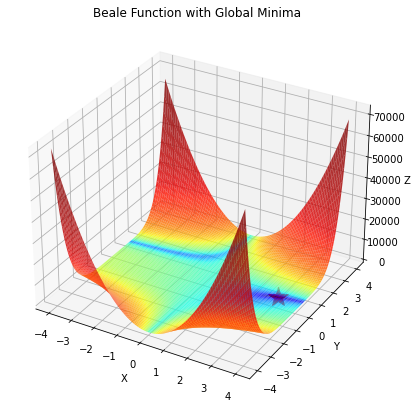

In [4]:
# 3D Plot of Beale function and the global minima

x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
x_mesh, y_mesh = np.meshgrid(x, y)
z = beale_f(x_mesh, y_mesh)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(min_x, min_y, beale_f(min_x, min_y), 'r*', markersize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Beale Function with Global Minima')
plt.show()

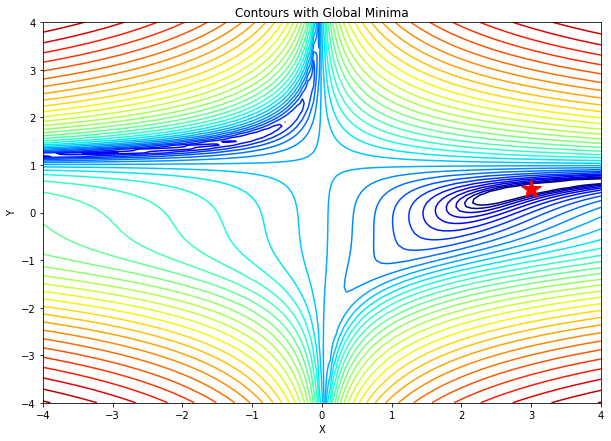

In [5]:
# 2D Plot of contours and the global minima

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(min_x, min_y, 'r*', markersize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Contours with Global Minima')
plt.show()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - Building an Optimizer - Adam
---
In this task, you are going to implement the Adam optimizer. We are giving the skeleton of the code and the description of the methods, and you need to implement the optimizer.

Recall the Adam update rule:
$$ m_{k+1} = \beta_1 m_k + (1-\beta_1)\nabla f(w^k) = \beta_1 m_k + (1-\beta_1)g_k $$  $$ v_{k+1} = \beta_2 v_k + (1-\beta_2)(\nabla f(w^k))^2 = \beta_2 v_k + (1-\beta_2)g^2_k $$ Then, they use an **unbiased** estimation: $$ \hat{m}_{k+1} = \frac{m_{k+1}}{1 -\beta_1^{k+1}} $$ $$ \hat{v}_{k+1} = \frac{v_{k+1}}{1 -\beta_2^{k+1}} $$ (the $\beta$'s are taken with the power of the current iteration) $$ w_{k+1} = w_k -\frac{\alpha}{\sqrt{\hat{v}_{k+1}} +\epsilon}\hat{m}_{k+1} $$

* $\epsilon$ deafult's is $10^{-8}$


1. Implement `class AdamOptimizer()`. 
    * `function` is the Python function you want to optimize.
    * `gradients` is the Python function that returns the gradients of `function`.
    * `x_init` and `y_init` are the initialization points for the optimizer.
    * Save the `path` of the optimizer (the minima points the optimizer visits during the optimization).
    * Stopping criterion: change in minima `<1e-7`.
    * **You can change the class however you wish, you can remove/add variables and methods as you wish**
2. For ` x_init=0.7, y_init=1.4, learning_rate=0.1, beta1=0.9, beta2=0.999`, optimize the Beale function. Plot the results **with the path taken** (better do it on the 2D contour plot).
3. Choose different initialization and learning rate and show the results as in 2.

In [6]:
class AdamOptimizer():
    def __init__(self, function, gradients, x_init=None, y_init=None, 
                 learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.f = function
        self.g = gradients
        scale = 3.0
        self.current_val = np.zeros([2])
        if x_init is not None:
            self.current_val[0] = x_init
        else:
            self.current_val[0] = np.random.uniform(low=-scale, high=scale)
        if y_init is not None:
            self.current_val[1] = y_init
        else:
            self.current_val[1] = np.random.uniform(low=-scale, high=scale)
        print("x_init: {:.3f}".format(self.current_val[0]))
        print("y_init: {:.3f}".format(self.current_val[1]))

        self.lr = learning_rate
        self.grads_first_moment = np.zeros([2])
        self.grads_second_moment = np.zeros([2])
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # for accumulation of loss and path (w, b)
        self.z_history = []
        self.x_history = []
        self.y_history = []


    def func(self, variables):
        """Beale function.
        Args:""
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          z: Beale function value at (x, y)
        """
        x, y = variables
        z = self.f(x, y)
        return z

    def gradients(self, variables):
        """Gradient of Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          grads: [dx, dy], shape: 1-rank Tensor (vector) np.array
            dx: gradient of Beale function with respect to x-dimension of inputs
            dy: gradient of Beale function with respect to y-dimension of inputs
        """
        
        x, y = variables
        grads = self.g(x, y)
        return grads


    def weights_update(self, grads, time):
        """Weights update using Adam.
        
          g1 = beta1 * g1 + (1 - beta1) * grads
          g2 = beta2 * g2 + (1 - beta2) * grads ** 2
          g1_unbiased = g1 / (1 - beta1**time)
          g2_unbiased = g2 / (1 - beta2**time)
          w = w - lr * g1_unbiased / (sqrt(g2_unbiased) + epsilon)
        """
        
        time += 1
        self.grads_first_moment = self.beta1 * self.grads_first_moment + (1 - self.beta1) * grads
        self.grads_second_moment = self.beta2 * self.grads_second_moment + (1 - self.beta2) * grads**2
        g1_unbiased = self.grads_first_moment / ( 1 - self.beta1**time)
        g2_unbiased = self.grads_second_moment / (1 - self.beta2**time)
        
        self.current_val = self.current_val - self.lr * g1_unbiased / (np.sqrt(g2_unbiased) + self.epsilon)

        
    def history_update(self, z, x, y):
        """Accumulate all interesting variables
        """
        
        self.z_history = self.z_history + [z]
        self.x_history = self.x_history + [x]
        self.y_history = self.y_history + [y]


    def train(self, max_steps):
        for step in range(max_steps):
            variables = self.current_val
            z = self.func(variables)
            grads = self.gradients(variables)
            self.weights_update(grads, time=0)
            self.history_update(variables[0], variables[1], z)

        return self.z_history, self.x_history, self.y_history
    

In [7]:
"""
Your Code Here
"""

'\nYour Code Here\n'

In [8]:
opt = AdamOptimizer(beale_f, beale_grads, x_init=0.7, y_init=1.4, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8)

x_init: 0.700
y_init: 1.400


In [9]:
%time
x_his, y_his, z_his = opt.train(1000)
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt.current_val[0], opt.current_val[1]))

CPU times: total: 0 ns
Wall time: 0 ns
Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 3.0000  y: 0.5000


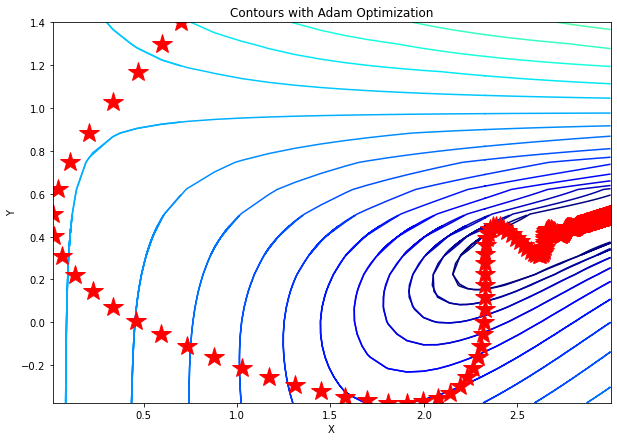

In [10]:
# plot the Beale function values during the optimization

x_his = np.array(x_his).reshape(1000,1)
y_his = np.array(y_his).reshape(1000,1)

x_mesh, y_mesh = np.meshgrid(x_his, y_his)
z = beale_f(x_mesh, y_mesh)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(x_his, y_his, 'r*', markersize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Contours with Adam Optimization')
plt.show()

x_init: 0.800
y_init: 1.700
CPU times: total: 0 ns
Wall time: 0 ns
Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 2.9203  y: 0.4793


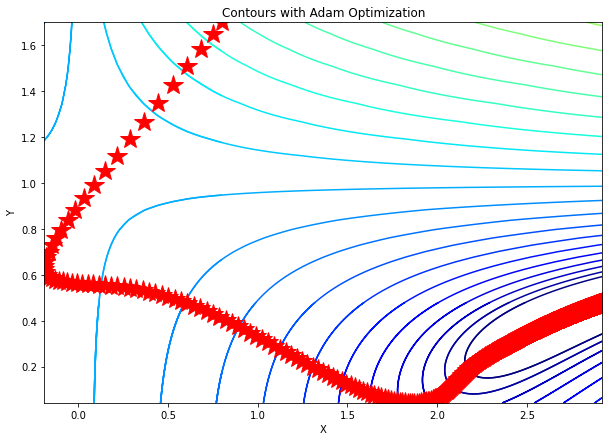

In [11]:
# The same as 2 but with different init and learning rate values


opt = AdamOptimizer(beale_f, beale_grads, x_init=0.8, y_init=1.7, learning_rate=0.05, beta1=0.9, beta2=0.999, epsilon=1e-8)

%time
x_his, y_his, z_his = opt.train(1000)
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt.current_val[0], opt.current_val[1]))

x_his = np.array(x_his).reshape(1000,1)
y_his = np.array(y_his).reshape(1000,1)

x_mesh, y_mesh = np.meshgrid(x_his, y_his)
z = beale_f(x_mesh, y_mesh)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(x_his, y_his, 'r*', markersize=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Contours with Adam Optimization')
plt.show()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - PyTorch Autograd
---
For the function from the theory practice: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2)  $$

1. Implement it and its dervative (explicitly) using `torch`.
2. Define a scalar tensor `x` and use `autograd` to calculate the derivative w.r.t $x$. Does the result correspond to the output of the function the calculates the derivative explicitly?

In [12]:
def f(x):
    f_val = None
    """
    Your Code Here
    """
    f_val = torch.exp(torch.exp(x) + torch.exp(x)**2) + torch.sin(torch.exp(x) + torch.exp(x)**2)++585
    return f_val

def derv_f(x):
    derv_val = None
    """
    Your Code Here
    """
    derv_val = (torch.exp(torch.exp(x) + torch.exp(x)**2) + torch.sin(torch.exp(x) + torch.exp(x)**2)) * (torch.exp(x) + 2*torch.exp(2*x))
    return derv_val

In [13]:
x = torch.tensor(0.5, requires_grad=True)
print(x)
f_res = f(x)
f_manual_grad = derv_f(x.detach()) 

"""
Your Code Here
"""
# Calculate with torch autograd
f_res.backward()
f_autograd = x.grad

print(f_manual_grad)
print(f_autograd)

tensor(0.5000, requires_grad=True)
tensor(551.7038)
tensor(555.9719)


We can see that the autograd gave us result correspond to the manual grad output. The small difference is a numerical error.

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4 - Low Rank Matrix Factorization 
---
Consider the following optimization problem: $$ \min_{\hat{U}, \hat{V}}||A - \hat{U}\hat{V}||_F^{2} $$ Where $A \in \mathcal{R}^{m \times n},\hat{U} \in \mathcal{R}^{m \times r}, \hat{V} \in \mathcal{R}^{r \times n} $ and $r < min(m,n)$ ($r$ is the rank of the matrix). $||\cdot||_F^2$ denotes the Frobenius norm.

1. Implement a function, `gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01)`, that given a 2D tensor `A` and a `rank`, will calculate the low-rank factorization of `A` using **gradient decsent**. Compute and apply all the gradients of $\hat{U}$ and of $\hat{V}$ once per epoch. $\hat{U}$ and $\hat{V}$ should be initially created with uniform random values. Use PyTorch's `autograd` for the gradients.
    * To compute the squared Frobenius norm loss (reconstruction loss), use `torch.nn.functional.mse loss with reduction=’sum’`.

2. Use the provided `data` of the Iris dataset of 150 instances and 4 features. Apply `gd_factorize_ad` to compute the 2-rank matrix factorization of `data`. What is the reconstruction loss?

In [14]:
df = load_iris(as_frame=True).data # option 1
# df = pd.read_csv('./iris.data', header=None) # option 2
data = torch.tensor(df.iloc[:, [0, 1, 2, 3]].values)
data = data - data.mean(dim=0)

In [15]:

import torch
import torch.nn.functional as F

def gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01):
    m, n = A.shape
    U = torch.randn(m, rank, requires_grad=True)
    V = torch.randn(rank, n, requires_grad=True)
    
    for epoch in range(num_epochs):

        Y = torch.mm(U, V)
        loss = F.mse_loss(A, Y, reduction='sum')
        
        loss.backward()
        
        with torch.no_grad():
            U -= lr * U.grad
            V -= lr * V.grad
            
            U.grad.zero_()
            V.grad.zero_()
    
    return U.detach(), V.detach()


In [16]:

import numpy as np


A = torch.tensor(data, dtype=torch.float32)

rank = 2
U, V = gd_factorize_ad(A, rank)

reconstructed = torch.mm(U, V)

reconstruction_loss = F.mse_loss(A, reconstructed, reduction='sum').item()

print("Reconstruction Loss: ", reconstruction_loss)


C:\Users\user\AppData\Local\Temp\ipykernel_7952\3712564741.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(data, dtype=torch.float32)


Reconstruction Loss:  15.204644203186035


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/